In [1]:
%matplotlib inline

# The Average Thing #3: Artifacts over time

In this post, we're going to explore how the number of artifacts that were received over time.

In [2]:
import pandas as pd
import re
import csv
import itertools
import numpy as np
from matplotlib import pyplot as plt
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", 40)

data = pd.read_csv("cstmc-CSV-en.csv", delimiter = "|", error_bad_lines=False, warn_bad_lines=False)

C:\Users\dfthd\Anaconda3\envs\python2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


From the [data dictionary](http://techno-science.ca/en/open-data/open-data-dictionary.php), the first four digits of the artifact number reflect the year in which the museum acquired them. How many artifacts did the museum acquire each year?

In [3]:
data['YearObtained'] = data['artifactNumber'].str.extract(r'(\d\d\d\d)', expand=False)

In [4]:
data['YearObtained'].unique()

array(['1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'], dtype=object)

## Number of objects each year

This is a dataframe/table of the counts of data each attribute has. Besides telling us how many artifacts the museum received that year (in artifactNumber), it also tells us how many of those cases have available data.

In [5]:
data.groupby(by = 'YearObtained').count()

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,EndDate,date_qualifier,patent,NumberOfComponents,ArtifactFinish,ContextCanada,ContextFunction,ContextTechnical,group1,category1,subcategory1,group2,category2,subcategory2,group3,category3,subcategory3,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail
YearObtained,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1966,2110,1719,1540,787,193,1629,1537,588,653,1073,432,925,143,2107,1375,422,1124,483,1662,1662,1276,164,164,115,14,14,9,1550,1188,1221,742,57,20,54,1193,1193
1967,1937,1556,1074,1017,543,1402,1290,521,700,849,257,718,51,1937,735,349,749,456,1498,1498,706,67,67,25,2,2,2,1119,845,999,849,8,39,21,1257,1257
1968,2002,1313,938,469,261,1008,918,342,444,442,151,382,94,2002,478,224,385,215,1239,1239,938,46,46,30,3,3,1,943,694,705,490,1,0,6,1185,1185
1969,2793,2065,1798,950,450,1912,1674,610,753,1094,309,986,189,2793,1098,554,1139,689,2002,2002,1655,201,201,170,2,2,2,1809,1555,1549,1154,0,8,78,1934,1934
1970,2041,1529,827,977,790,1494,1128,370,537,464,139,417,123,2041,662,159,358,157,1503,1503,520,59,59,21,1,1,1,825,778,716,629,2,30,39,1253,1253
1971,1143,809,601,408,241,744,659,329,365,317,111,281,99,1143,383,130,227,166,756,756,506,21,21,13,2,2,0,605,539,550,443,3,4,11,678,678
1972,2127,1540,1528,932,286,1439,1143,561,608,723,257,623,169,2127,1495,197,457,278,1442,1442,793,149,149,122,14,14,0,1533,1258,1335,641,73,1,6,1482,1482
1973,1304,894,778,376,214,796,754,305,376,339,60,256,71,1304,740,206,336,234,848,848,685,44,44,31,0,0,0,780,733,749,645,5,1,17,784,784
1974,1226,894,666,505,324,775,713,431,503,365,131,319,123,1226,500,173,314,198,813,813,617,37,37,15,0,0,0,671,543,552,460,1,1,27,881,881


In [6]:
data.groupby(by = 'YearObtained').count()['artifactNumber'].mean()

2086.86

The mean number of artifacts per year is 2086.6. Let's combine a scatterplot with a fit line to visualize this. I used the examples from [here](https://sites.google.com/site/scienceuprising/tools/useful-python-scripts/matplotlib/using-numpy-s-polyfit-in-combination-with-matplotlib-to-fit-data-points) and [here](http://matthiaseisen.com/pp/patterns/p0170/).

LinregressResult(slope=-17.623769507803122, intercept=37166.973205282113, rvalue=-0.20498455928950232, pvalue=0.15328806044170382, stderr=12.1460638488731)


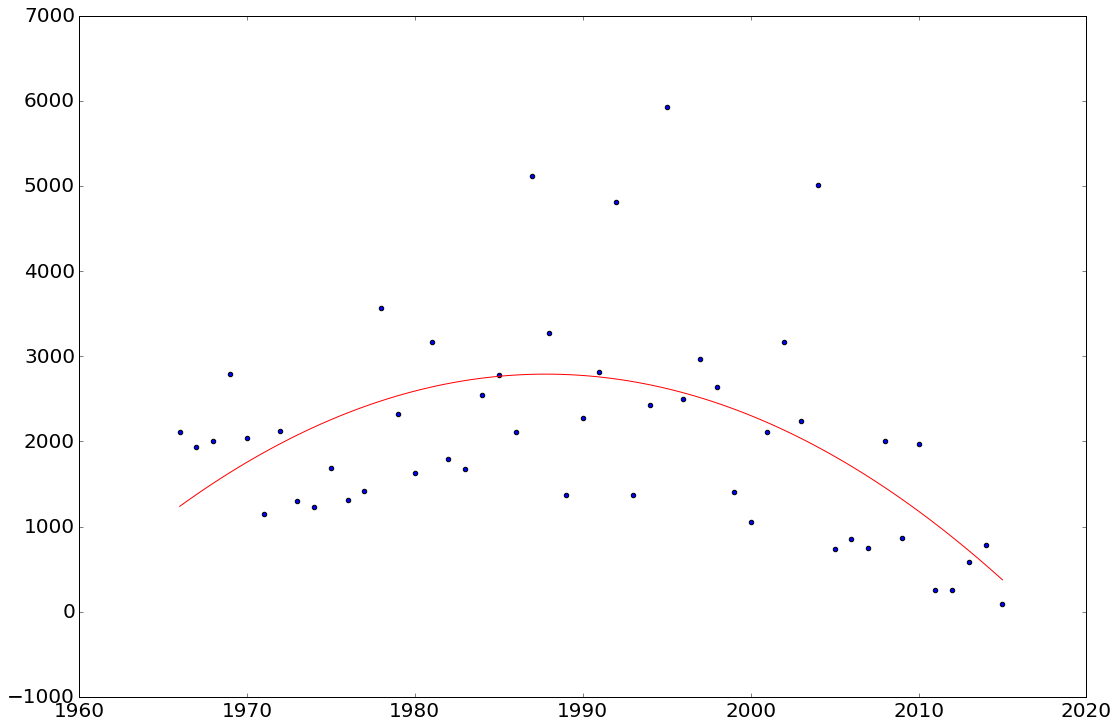

In [7]:
from scipy.stats import linregress

plt.figure(figsize = (15,10))

meandata = data.groupby(by = 'YearObtained').count()['artifactNumber']
x = pd.to_numeric(meandata.index.values)
y = meandata

print linregress(x,y)

fitline = np.polyfit(x, y, deg=2)

xpoints = np.linspace(min(x),max(x),100);
plt.plot(xpoints, fitline[2] + fitline[1]*xpoints + fitline[0]*xpoints**2 , color = 'red');

plt.scatter(range(min(x),max(x)+1), meandata);
plt.tight_layout()
plt.xticks(size = 20);
plt.yticks(size = 20);

## Some wrong statistics

If you look above, the function method lingress from the package scipy.stats only takes one predictor (x). First, to add in the polynomial term (x<sup>2</sup>), we're going to use the sm method from the statsmodels.api package.

A glance at these results suggest that that a quadratic model fit the data better than a linear model (R<sup>2</sup> of .25 vs. .02).

It should be said, however, that the inference tests (t-tests) from these results violate the assumption of independent errors. If you look at the "warnings" footnote, under [1], correct standard errors assume that the covariance matrix has been properly specified - it hasn't. One assumption that OLS regression makes is that the errors, or residuals of the model are independent - basically, that the points in the model are not related in some other way than the variables you're using to predict the outcome. In our case, that is untrue, as these are time series data, and years that are temporally close to one another will be related to each other.

In the future, I'm going to learn more about the types of models that are appropriate for these data (e.g., an [autoregressive](https://en.wikipedia.org/wiki/Autoregressive_model) model)

In [9]:
import statsmodels.api as sm

x = pd.to_numeric(meandata.index.values).reshape(50,1)
y = np.array(meandata).reshape(50,1)

xpred = np.column_stack((np.ones(50),np.array(x)))
xpredsquared = np.column_stack((xpred,np.array(x**2)))


print sm.OLS(y,xpred,hasconst=True).fit().summary()
print sm.OLS(y,xpredsquared, hasconst=True).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.105
Date:                Sat, 07 May 2016   Prob (F-statistic):              0.153
Time:                        00:51:12   Log-Likelihood:                -426.05
No. Observations:                  50   AIC:                             856.1
Df Residuals:                      48   BIC:                             859.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.717e+04   2.42e+04      1.537      0.1